In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

In [3]:
# Load dataset
df = pd.read_csv('Play Store Data.csv')


In [4]:
# Data cleaning & preprocessing
# Convert 'Size' to numeric (strip M, k etc.)
def convert_size(size_str):
    if pd.isna(size_str):
        return np.nan
    size_str = str(size_str).strip().upper()
    if size_str.endswith('M'):
        return float(size_str[:-1]) * 1_000_000
    elif size_str.endswith('K'):
        return float(size_str[:-1]) * 1_000
    try:
        return float(size_str)
    except:
        return np.nan

df['Size_bytes'] = df['Size'].apply(convert_size)

In [5]:
# Filter by average rating >=4.0
df = df[df['Rating'] >= 4.0]

# Filter by size >= 10M bytes (i.e. 10,000,000 bytes)
df = df[df['Size_bytes'] >= 10_000_000]


In [6]:
# Parse 'Last Updated' and filter by January month
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df[df['Last Updated'].dt.month == 1]

In [7]:
# Normalize 'Installs' (convert strings like "10,000+" to numbers)
def convert_installs(installs_str):
    if pd.isna(installs_str):
        return 0
    return int(installs_str.replace('+','').replace(',',''))

df['Installs_num'] = df['Installs'].apply(convert_installs)

In [8]:
# Group by Category
grouped = df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum'),
    total_installs=('Installs_num', 'sum')
).reset_index()

In [9]:
# Filter top 10 categories by installs
top10 = grouped.sort_values('total_installs', ascending=False).head(10)


In [10]:
# Prepare data for grouped bar chart
categories = top10['Category']
avg_ratings = top10['avg_rating']
total_reviews = top10['total_reviews']

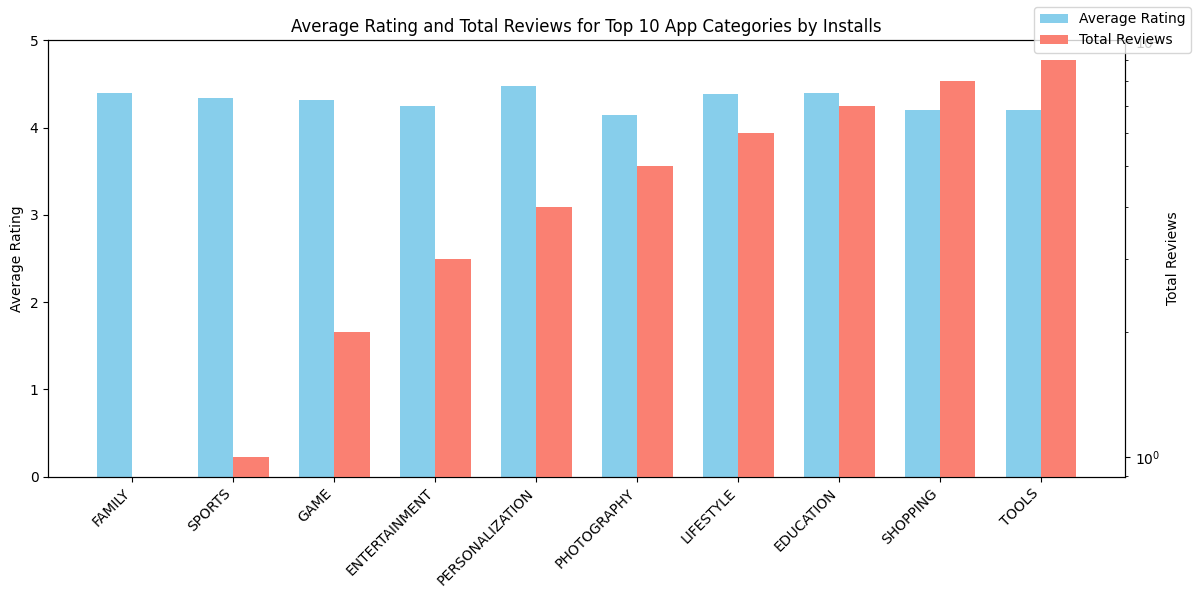

In [15]:
# Time based condition to show chart only between 3PM and 5PM IST
def show_chart_only_during_3_to_5_pm_ist():
    tz_ist = pytz.timezone('Asia/Kolkata')
    now_ist = datetime.now(tz_ist)
    return now_ist.hour >= 15 and now_ist.hour < 17

if show_chart_only_during_3_to_5_pm_ist():
    x = np.arange(len(categories))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))

    bars1 = ax1.bar(x - width/2, avg_ratings, width, label='Average Rating', color='skyblue')
    ax1.set_ylabel('Average Rating')
    ax1.set_ylim(0, 5)  # Ratings scale 0-5
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')

    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, total_reviews, width, label='Total Reviews', color='salmon')
    ax2.set_ylabel('Total Reviews')
    ax2.set_yscale('log')  # Log scale for large review counts

    ax1.set_title('Average Rating and Total Reviews for Top 10 App Categories by Installs')
    fig.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("The grouped bar chart is only visible between 3PM and 5PM IST.")

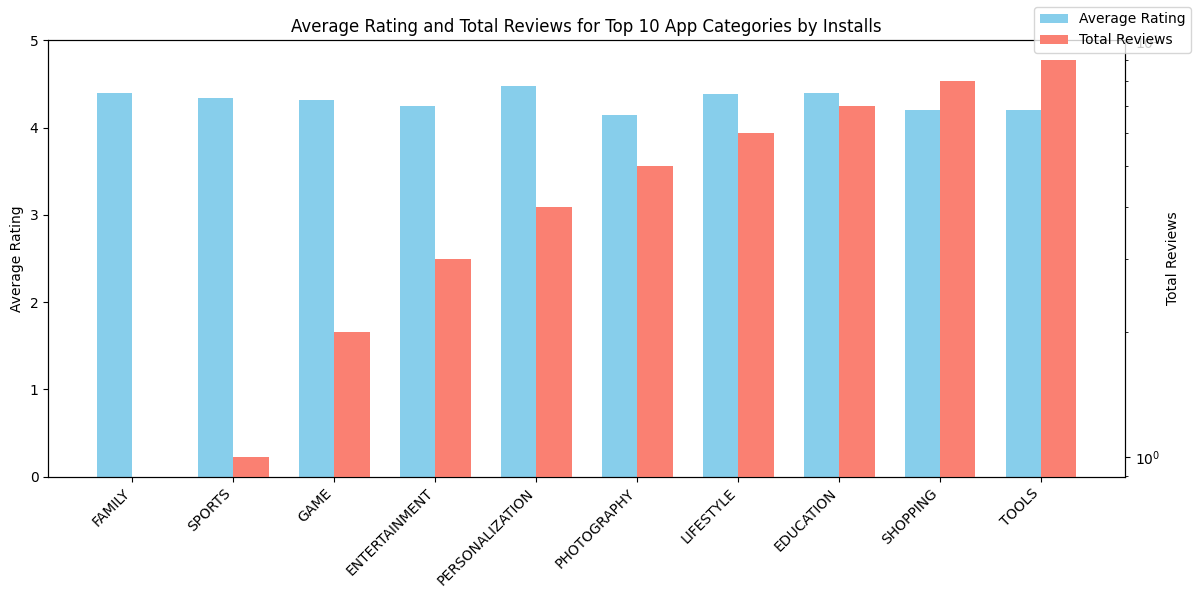

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

def show_chart_only_during_3_to_5_pm_ist():
    tz_ist = pytz.timezone('Asia/Kolkata')
    now_ist = datetime.now(tz_ist)
    return now_ist.hour >= 15 and now_ist.hour < 17

def show_chart_only_during_3_to_5_pm_ist():
    return True  # Override for testing to always show chart regardless of time


if show_chart_only_during_3_to_5_pm_ist():
    x = np.arange(len(categories))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))

    bars1 = ax1.bar(x - width/2, avg_ratings, width, label='Average Rating', color='skyblue')
    ax1.set_ylabel('Average Rating')
    ax1.set_ylim(0, 5)  # Ratings scale 0-5
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, rotation=45, ha='right')

    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, total_reviews, width, label='Total Reviews', color='salmon')
    ax2.set_ylabel('Total Reviews')
    ax2.set_yscale('log')  # Log scale for review counts

    ax1.set_title('Average Rating and Total Reviews for Top 10 App Categories by Installs')
    fig.legend(loc='upper right')

    plt.tight_layout()
    plt.show(fig)  # Explicitly show figure
else:
    print("The grouped bar chart is only visible between 3PM and 5PM IST.")
